In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import time
from functions import basic
from functions import interaction
from functions import evolution
%matplotlib inline

In [2]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [106]:
# reading input file
filename = "fcc100a256.txt"
lattice = basic.read_file(filename)

In [107]:
# computing ditances, finding neighbours

# no PBC test
start = time.process_time()
for i in range(100):
    mask,distances = basic.find_neighbours(*lattice)
print(f'no PBC - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

start = time.process_time()
for i in range(100):
    mask,distances = basic.find_neighbours(*lattice, PBC=True)
print(f'PBC - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

no PBC - 100 iterations; computing time: 0.57 seconds
PBC - 100 iterations; computing time: 0.58 seconds


In [108]:
# calculating potential energy
mask,distances = basic.find_neighbours(*lattice)

# approximate LJ
start = time.process_time()
for i in range(100):
    LJA = interaction.lennard_jones_approx(distances)
print(f'approximate LJ - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

# true LJ
start = time.process_time()
for i in range(100):
    LJ = interaction.lennard_jones(distances)
print(f'true LJ - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

print('')
print(f'approximate LJ: {LJA:.2f}')
print(f'true LJ: {LJ:.2f}')

/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:41: RuntimeWarning: divide by zero encountered in true_divide
  Epot_rp = 4*epsilon*((sigma/(mask_rp*distances))**12 - (sigma/(mask_rp*distances))**6)
/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:41: RuntimeWarning: invalid value encountered in subtract
  Epot_rp = 4*epsilon*((sigma/(mask_rp*distances))**12 - (sigma/(mask_rp*distances))**6)
/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:42: RuntimeWarning: invalid value encountered in multiply
  Epot_rc = Apoli7*mask_rc + Bpoli7*mask_rc*distances + Cpoli7*((mask_rc*distances)**2) + Dpoli7*((mask_rc*distances)**3) + Epoli7*((mask_rc*distances)**4) + Fpoli7*((mask_rc*distances)**5) + Gpoli7*((mask_rc*distances)**6) + Hpoli7*((mask_rc*distances)**7)
/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:41: RuntimeWarning: invalid value encountered in multiply
  Epot_rp = 4*epsilon*((sigma/(mask_rp*distances))**12 -

approximate LJ - 100 iterations; computing time: 0.74 seconds
true LJ - 100 iterations; computing time: 0.82 seconds

approximate LJ: -453.45
true LJ: -532.48


In [109]:
# calculating forces

# approximate LJ
start = time.process_time()
for i in range(100):
    FxA,FyA,FzA = interaction.calc_force_approx(*lattice,distances,PBC=True)
print(f'approximate LJ - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

# approximate LJ
start = time.process_time()
for i in range(100):
    Fx,Fy,Fz = interaction.calc_force(*lattice,distances,PBC=True)
print(f'true LJ - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

print('')
print(f'approximate LJ, force on 0-th atom: {FxA[1]:.2f},{FyA[1]:.2f},{FzA[1]:.2f}')
print(f'true LJ, force on 0-th atom: {Fx[1]:.2f},{Fy[1]:.2f},{Fz[1]:.2f}')

/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:89: RuntimeWarning: invalid value encountered in multiply
  Fx_rp = 24*epsilon*( 2*sigma**12*(mask_rp*distances)**(-14) - sigma**6*(mask_rp*distances)**(-8) )*(mask_rp*x_distances)
/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:89: RuntimeWarning: divide by zero encountered in power
  Fx_rp = 24*epsilon*( 2*sigma**12*(mask_rp*distances)**(-14) - sigma**6*(mask_rp*distances)**(-8) )*(mask_rp*x_distances)
/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:89: RuntimeWarning: invalid value encountered in subtract
  Fx_rp = 24*epsilon*( 2*sigma**12*(mask_rp*distances)**(-14) - sigma**6*(mask_rp*distances)**(-8) )*(mask_rp*x_distances)
/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:90: RuntimeWarning: invalid value encountered in multiply
  Fx_rc = - 2*(mask_rc*x_distances)*( 0.5*Bpoli7/(mask_rc*distances) + Cpoli7 + 1.5*Dpoli7*(mask_rc*distances) + 2*Epoli7*(mask_r

approximate LJ - 100 iterations; computing time: 2.79 seconds
true LJ - 100 iterations; computing time: 3.19 seconds

approximate LJ, force on 0-th atom: 0.00,0.00,-0.11
true LJ, force on 0-th atom: 0.00,0.00,0.37


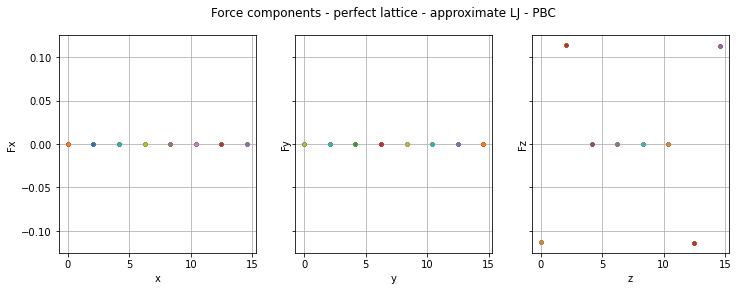

In [110]:
n_atoms,sx,sy,sz,x,y,z = lattice

fig,axs = plt.subplots(1,3,sharey=True,figsize=(12,4))

for i in range(255):
    axs[0].plot(x[i],FxA[i],'.')
    axs[1].plot(y[i],FyA[i],'.')
    axs[2].plot(z[i],FzA[i],'.')

for i in range(3):
    axs[i].grid()

axs[0].set_xlabel('x')
axs[0].set_ylabel('Fx')
axs[1].set_xlabel('y')
axs[1].set_ylabel('Fy')
axs[2].set_xlabel('z')
axs[2].set_ylabel('Fz')

fig.suptitle('Force components - perfect lattice - approximate LJ - PBC')
plt.show()

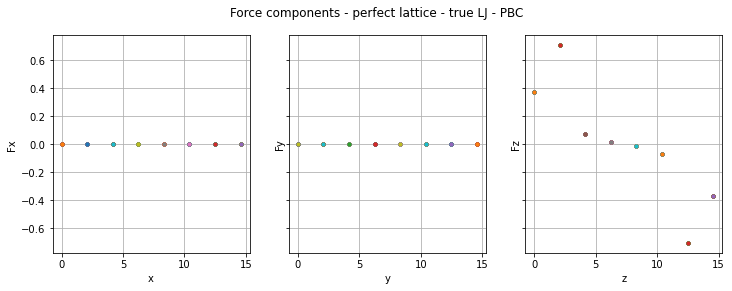

In [111]:
fig,axs = plt.subplots(1,3,sharey=True,figsize=(12,4))

for i in range(255):
    axs[0].plot(x[i],Fx[i],'.')
    axs[1].plot(y[i],Fy[i],'.')
    axs[2].plot(z[i],Fz[i],'.')

for i in range(3):
    axs[i].grid()

axs[0].set_xlabel('x')
axs[0].set_ylabel('Fx')
axs[1].set_xlabel('y')
axs[1].set_ylabel('Fy')
axs[2].set_xlabel('z')
axs[2].set_ylabel('Fz')

fig.suptitle('Force components - perfect lattice - true LJ - PBC')
plt.show()

In [112]:
# initializing speed
m_ag = 108*1.66e-27/16
kb = 1/11603
T = 100

start = time.process_time()
vx,vy,vz = basic.initialize_speed(n_atoms,x,y,z,T,remove_translation=True)
print(f'speed initialization; computing time: {time.process_time() - start :.3f} seconds\n')

v2 = vx**2 + vy**2  + vz**2
Ekin = 0.5*m_ag*np.sum(v2)
Tkin = 2*Ekin/(3*n_atoms*kb)  

print('translation removal check:')
print(f'    mean vx: {np.mean(vx)}')
print(f'    mean vy: {np.mean(vy)}')
print(f'    mean vz: {np.mean(vz)}\n')
print(f'Set temperature: {T:.2f}K; real temperature: {Tkin:.2f}K')

speed initialization; computing time: 0.006 seconds

translation removal check:
    mean vx: -0.0001220703125
    mean vy: -0.00014495849609375
    mean vz: -9.918212890625e-05

Set temperature: 100.00K; real temperature: 100.00K


### Test zone - used for quick tests and monkey patch

In [113]:
timelenght = 160e-12    
timestep = 2.5e-14     
steps = int(timelenght/timestep)
time_array = np.arange(timestep,timelenght,timestep)
Temp_array = []
energy_array = []

In [114]:
ax,ay,az = interaction.calc_acceleration(Fx,Fy,Fz)
v2 = vx**2 + vy**2  + vz**2
E_kin = 0.5*m_ag*np.sum(v2)
T_kin = 2*Ekin/(3*n_atoms*kb)  
E_pot = interaction.lennard_jones(distances)
E_tot = Ekin + E_pot

#atoms motion arrays
all_x = []
all_y = []
all_z = []
all_vz = []
all_az = []

In [115]:
for i in tqdm(range(0,steps)):
    new_x,new_y,new_z = evolution.make_a_move(x,y,z,vx,vy,vz,ax,ay,az,timestep)
    lattice = n_atoms,sx,sy,sz,new_x,new_y,new_z
    mask, distance = basic.find_neighbours(*lattice, PBC=False)
    new_Fx,new_Fy,new_Fz = interaction.calc_force(n_atoms,sx,sy,sz,new_x,new_y,new_z,distance,PBC=False)
    new_ax,new_ay,new_az = interaction.calc_acceleration(new_Fx,new_Fy,new_Fz)
    new_vx,new_vy,new_vz = evolution.update_velocity(vx,vy,vz,ax,ay,az,new_ax,new_ay,new_az,timestep)
    v2 = new_vx**2 + new_vy**2  + new_vz**2
    E_kin = 0.5*m_ag*np.sum(v2)
    T_kin = 2*E_kin/(3*n_atoms*kb)  
    E_pot = interaction.lennard_jones(distances)
    E_tot = E_kin + E_pot
    ###
    Temp_array.append(T_kin)
    energy_array.append(E_tot)
    ###
    x,y,z = new_x,new_y,new_z
    vx,vy,vz = new_vx,new_vy,new_vz
    ax,ay,az = new_ax,new_ay,new_az
    all_x.append(x)
    all_y.append(y)
    all_z.append(z)
    all_vz.append(vz)
    all_az.append(az)
    
Temp_array = np.asarray(Temp_array)
energy_array = np.asarray(energy_array)
T_mean = np.mean(Temp_array)
E_mean = np.mean(energy_array)
T_var = np.var(Temp_array)
E_var = np.var(energy_array)

  0%|          | 0/6399 [00:00<?, ?it/s]

Text(0, 0.5, 'Temperature [K]')

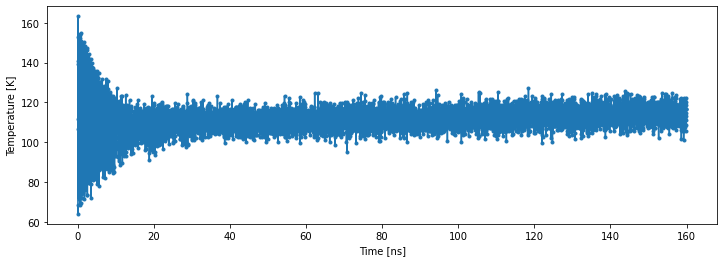

In [116]:
fig,axs = plt.subplots(1,1,sharey=True,figsize=(12,4))

axs.plot(time_array*1e12,Temp_array,'.-')
axs.set_xlabel('Time [ns]')
axs.set_ylabel('Temperature [K]')

Text(0, 0.5, 'z[0] [nm]')

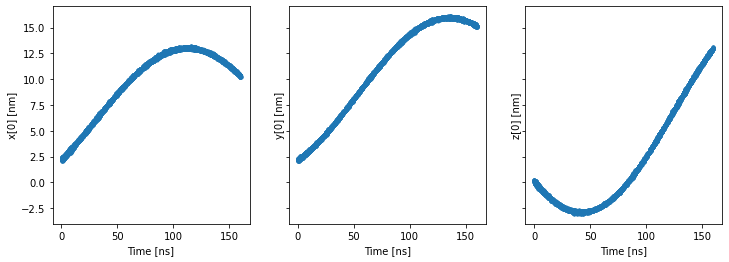

In [117]:
fig,axs = plt.subplots(1,3,sharey=True,figsize=(12,4))

axs[0].plot(time_array*1e12,np.transpose(all_x)[0],'.-')
axs[1].plot(time_array*1e12,np.transpose(all_y)[0],'.-')
axs[2].plot(time_array*1e12,np.transpose(all_z)[0],'.-')

for ax in axs:
    ax.set_xlabel('Time [ns]')
    
axs[0].set_ylabel('x[0] [nm]')
axs[1].set_ylabel('y[0] [nm]')
axs[2].set_ylabel('z[0] [nm]')